In [1]:
import pandas as pd

df = pd.read_json('data/anime.json')

In [2]:
from collections import defaultdict

sequels_dic = defaultdict(set)
sequels_list = []

for _, row in df.iterrows():
    for relation_type, list_of_dics in row['related'].items():
        anime1 = row['mal_id']
        for dic in list_of_dics:
            if dic['type'] == 'anime':
                anime2 = dic['mal_id']
                if relation_type == 'Sequel' and anime2 not in sequels_dic[anime1]:
                    sequels_dic[anime1].add(anime2)
                    sequels_list.append((anime1, anime2))
                if relation_type == 'Prequel' and anime1 not in sequels_dic[anime1]:
                    sequels_dic[anime2].add(anime1)
                    sequels_list.append((anime2, anime1))

In [3]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(df.mal_id)
G.add_edges_from(sequels_list)
components = list(nx.connected_components(G))

In [4]:
import matplotlib.pyplot as plt

def plot(component):
    filter = {k: sequels_dic[k] for k in component}
    H = nx.DiGraph(filter)
    nx.draw(H, with_labels=True)
    plt.show

In [10]:
class Series:
    def __init__(self, comp):
        self.components = comp
        self.animes = df.loc[df.mal_id.isin(comp)]
        self.max = self.animes.mal_members.argmax()

        self.title = self.animes.iloc[self.max].title
        self.popularity = self.animes.iloc[self.max].mal_members
        self.score = (self.animes.mal_score * self.animes.mal_members).sum() / self.animes.mal_members.sum()
        self.image_url = self.animes.iloc[self.max].image_url
        self.episodes = self.animes.episodes.sum()
        self.seasons = len(self.animes)
        self.synopsis = self.animes.iloc[self.max].synopsis
        self.date = self.animes.iloc[self.max].aired_start
        self.genres = self.animes.iloc[self.max].genres
    
    def __str__(self):
        return f'Title: {self.title}, popularity: {self.popularity}, score: {self.score}'
    
    def to_dict(self, series_id):
        return {'series_id': series_id, 'title': self.title, 'popularity': self.popularity, 'score': self.score, 'image_url': self.image_url,
                'episodes': self.episodes, 'seasons': self.seasons, 'synopsis': self.synopsis, 'date': self.date}

In [11]:
series_list = [Series(comp) for comp in components]

C:\Users\ANDREU~1\AppData\Local\Temp/ipykernel_15060/1904559539.py:9: RuntimeWarning: invalid value encountered in double_scalars
  self.score = (self.animes.mal_score * self.animes.mal_members).sum() / self.animes.mal_members.sum()


In [12]:
series_list.sort(key=lambda x: -x.popularity)

In [13]:
dics = [series_list[i].to_dict(i) for i in range(len(series_list))]

In [15]:
g.head()

,series_id,title,popularity,score,image_url,episodes,seasons,synopsis
0,0,Death Note,2833167,8.630000,https://cdn.myanimelist.net/images/anime/9/945...,37.0,1,"A shinigami, as a god of death, can kill any p..."
1,1,Shingeki no Kyojin,2799964,8.676964,https://cdn.myanimelist.net/images/anime/10/47...,75.0,5,"Centuries ago, mankind was slaughtered to near..."
2,2,Fullmetal Alchemist: Brotherhood,2425872,9.170000,https://cdn.myanimelist.net/images/anime/1223/...,64.0,1,"""In order for something to be obtained, someth..."
3,3,Sword Art Online,2375355,7.190084,https://cdn.myanimelist.net/images/anime/11/39...,100.0,9,"In the year 2022, virtual reality has progress..."
4,4,One Punch Man,2316605,8.164837,https://cdn.myanimelist.net/images/anime/12/76...,25.0,3,The seemingly ordinary and unimpressive Saitam...


In [14]:
g = pd.DataFrame(dics)
g.to_json('series.json', indent=4, orient='records')

In [43]:
import plotly.express as px

fruits = ["apples", "oranges", "bananas"]
fig = px.line(x=fruits, y=[1,3,2], color=px.Constant("This year"),
             labels=dict(x="Fruit", y="Amount", color="Time Period"))
fig.add_bar(x=fruits, y=[2,1,3], name="Last year")
fig.show()

In [54]:
import plotly.express as px

fig = px.line(series_list[1].animes, x='title', y='mal_score')
fig.add_bar(x=series_list[1].animes['title'], y=series_list[1].animes['mal_score'])
fig.show()

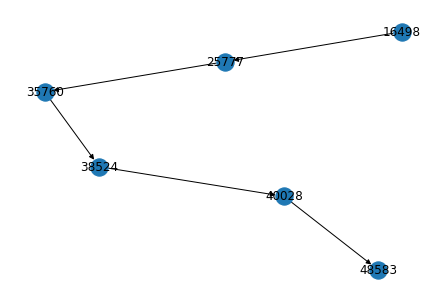

In [28]:
plot(series_list[1].components)

In [11]:
import networkx as nx  
import matplotlib.pyplot as plt

G = nx.DiGraph(small)

components = nx.strongly_connected_components(G)

small = {k: sequels[k] for k in range(10)}

G = nx.DiGraph(small)

nx.draw(G, with_labels=True)
plt.show()

NameError: name 'small' is not defined

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

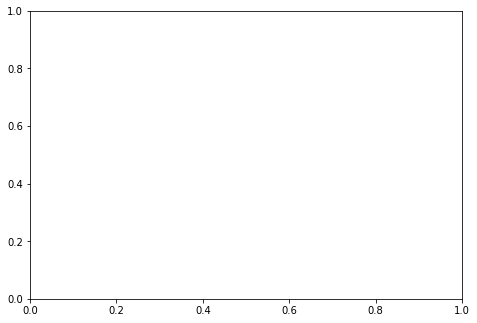

In [4]:
import networkx as nx

G = nx.DiGraph(sequels)

nx.draw(G)